In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
cust_data = pd.read_csv("datasets\\anon_cust_data.csv", index_col=[0])

In [4]:
cust_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
cust_data.shape

(7043, 20)

In [6]:
cust_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
cust_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
cust_data["TotalCharges"] = pd.to_numeric(cust_data["TotalCharges"], errors='coerce')

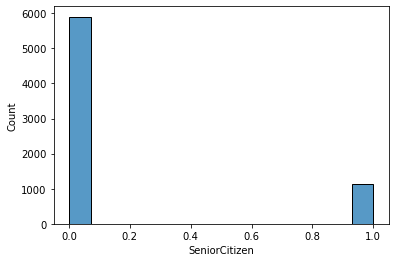

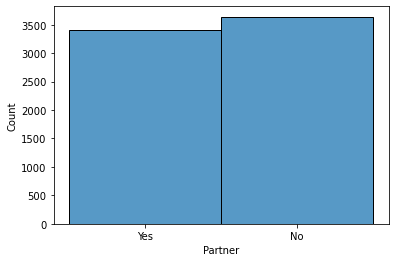

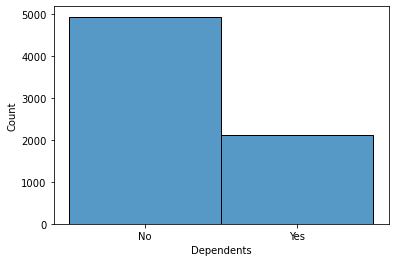

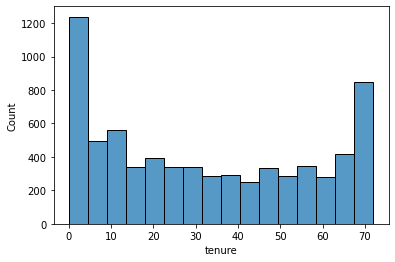

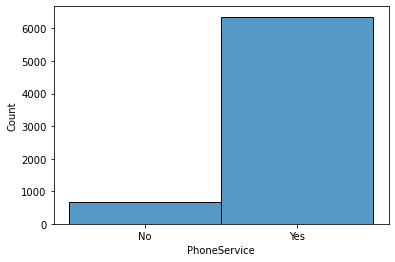

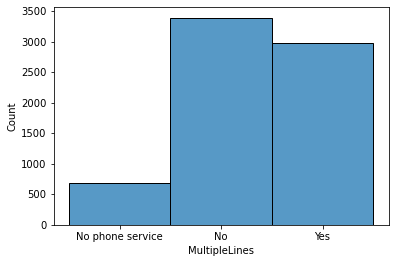

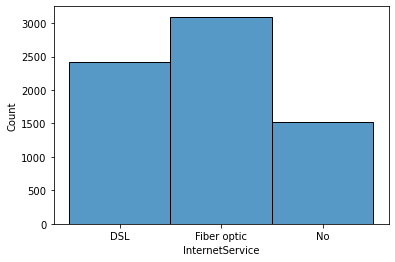

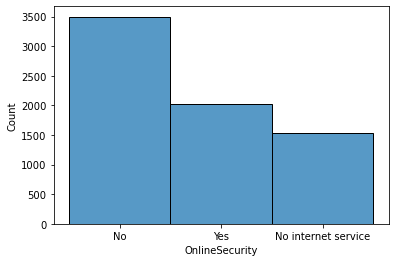

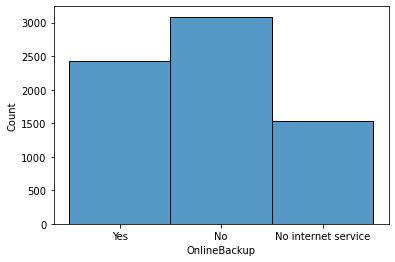

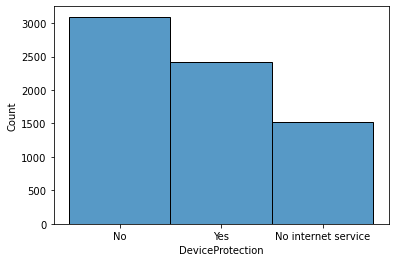

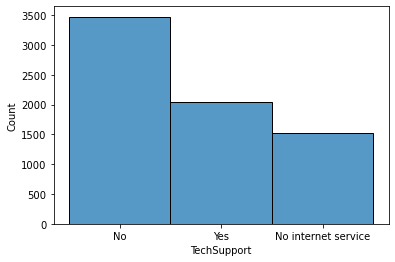

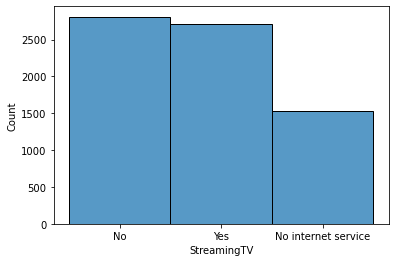

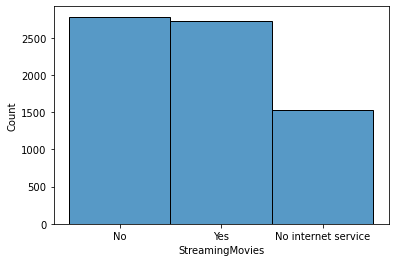

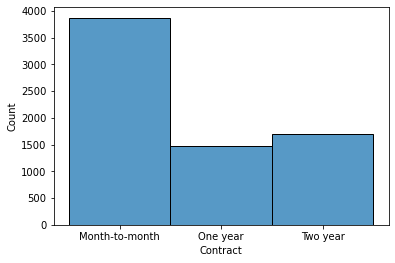

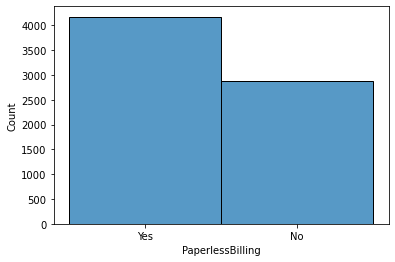

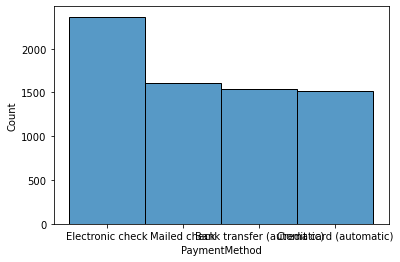

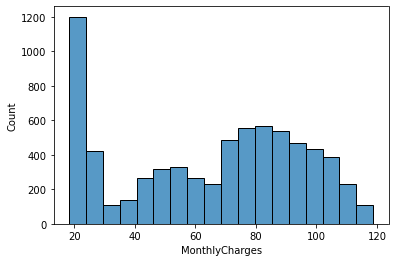

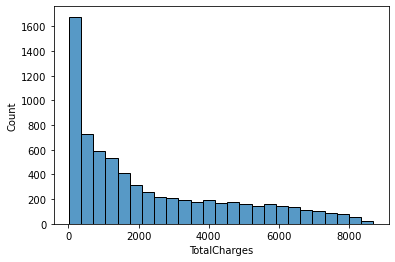

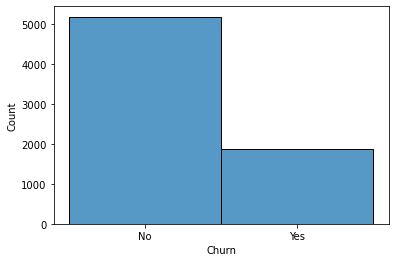

In [11]:
for i in range(19):
    if i == 17:
        #total_charge = pd.to_numeric(X["TotalCharges"], errors='coerce')
        cust_data["TotalCharges"].fillna(value=cust_data["TotalCharges"].mean(), inplace=True)
        sns.histplot(data=cust_data, x="TotalCharges")
        plt.show()
    else:
        sns.histplot(cust_data, x=cust_data.iloc[:, i+1])
        plt.show()


In [14]:
cust_data_enc = pd.get_dummies(cust_data, drop_first=True)
cust_data_enc.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [15]:
correlation = cust_data_enc.corr()
correlation.sort_values("Churn_Yes", axis=0)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
tenure,0.016567,1.000000,0.247900,0.824757,0.005106,0.379697,0.159712,0.008448,-0.008448,0.331941,...,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852,-0.352229
Contract_Two year,-0.117000,0.558533,-0.074681,0.357224,-0.003695,0.248091,0.204613,0.003519,-0.003519,0.106253,...,0.072049,0.218278,0.073960,-0.289510,1.000000,-0.147889,0.173265,-0.282138,-0.004705,-0.302253
OnlineSecurity_No internet service,-0.182742,-0.039062,-0.763557,-0.374263,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,...,-0.415552,1.000000,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890
StreamingMovies_No internet service,-0.182742,-0.039062,-0.763557,-0.374263,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,...,-0.415552,1.000000,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890
StreamingTV_No internet service,-0.182742,-0.039062,-0.763557,-0.374263,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,...,-0.415552,1.000000,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890
TechSupport_No internet service,-0.182742,-0.039062,-0.763557,-0.374263,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,...,-0.415552,1.000000,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890
DeviceProtection_No internet service,-0.182742,-0.039062,-0.763557,-0.374263,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,...,-0.415552,1.000000,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890
OnlineBackup_No internet service,-0.182742,-0.039062,-0.763557,-0.374263,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,...,-0.415552,1.000000,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890
InternetService_No,-0.182742,-0.039062,-0.763557,-0.374263,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,...,-0.415552,1.000000,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890
TotalCharges,0.102395,0.824757,0.650468,1.000000,0.000048,0.318812,0.064535,0.112851,-0.112851,0.468689,...,0.515314,-0.374263,0.519574,0.170491,0.357224,0.157676,0.182581,-0.060412,-0.294125,-0.199428


<AxesSubplot:>

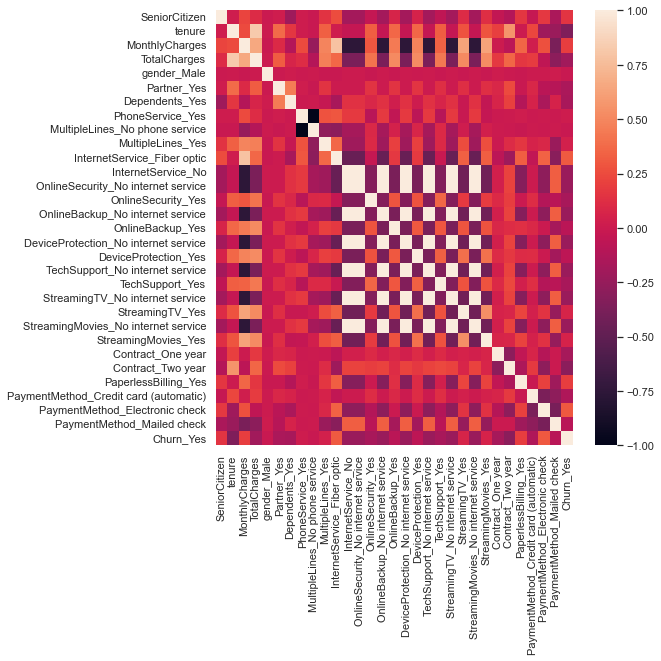

In [19]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(correlation, xticklabels=True, yticklabels=True)


<AxesSubplot:>

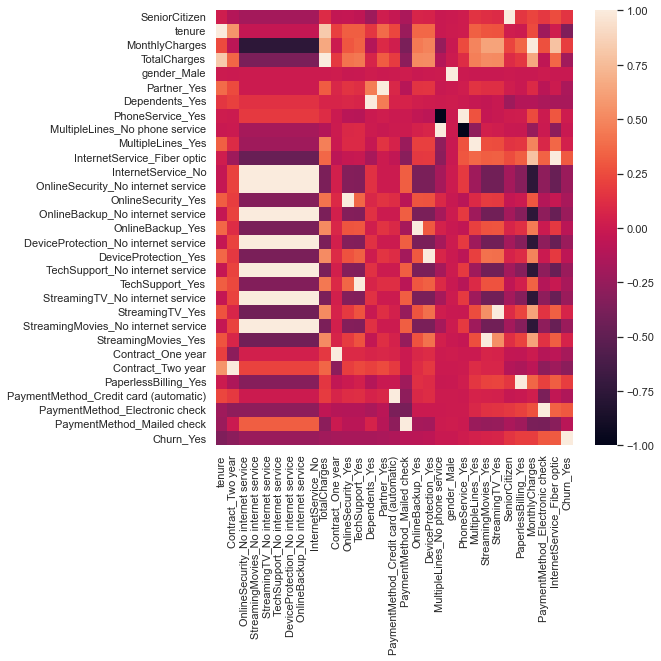

In [ ]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(correlation.sort_values("Churn_Yes", axis=1, ascending=True), xticklabels=True, yticklabels=True)


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>,
        <AxesSubplot:title={'center':'gender_Male'}>,
        <AxesSubplot:title={'center':'Partner_Yes'}>],
       [<AxesSubplot:title={'center':'Dependents_Yes'}>,
        <AxesSubplot:title={'center':'PhoneService_Yes'}>,
        <AxesSubplot:title={'center':'MultipleLines_No phone service'}>,
        <AxesSubplot:title={'center':'MultipleLines_Yes'}>,
        <AxesSubplot:title={'center':'InternetService_Fiber optic'}>,
        <AxesSubplot:title={'center':'InternetService_No'}>],
       [<AxesSubplot:title={'center':'OnlineSecurity_No internet service'}>,
        <AxesSubplot:title={'center':'OnlineSecurity_Yes'}>,
        <AxesSubplot:title={'center':'OnlineBackup_No internet service'}>,
        <AxesSubplot:title={'center':'OnlineBackup_Yes'}>,
        <AxesSubplot:

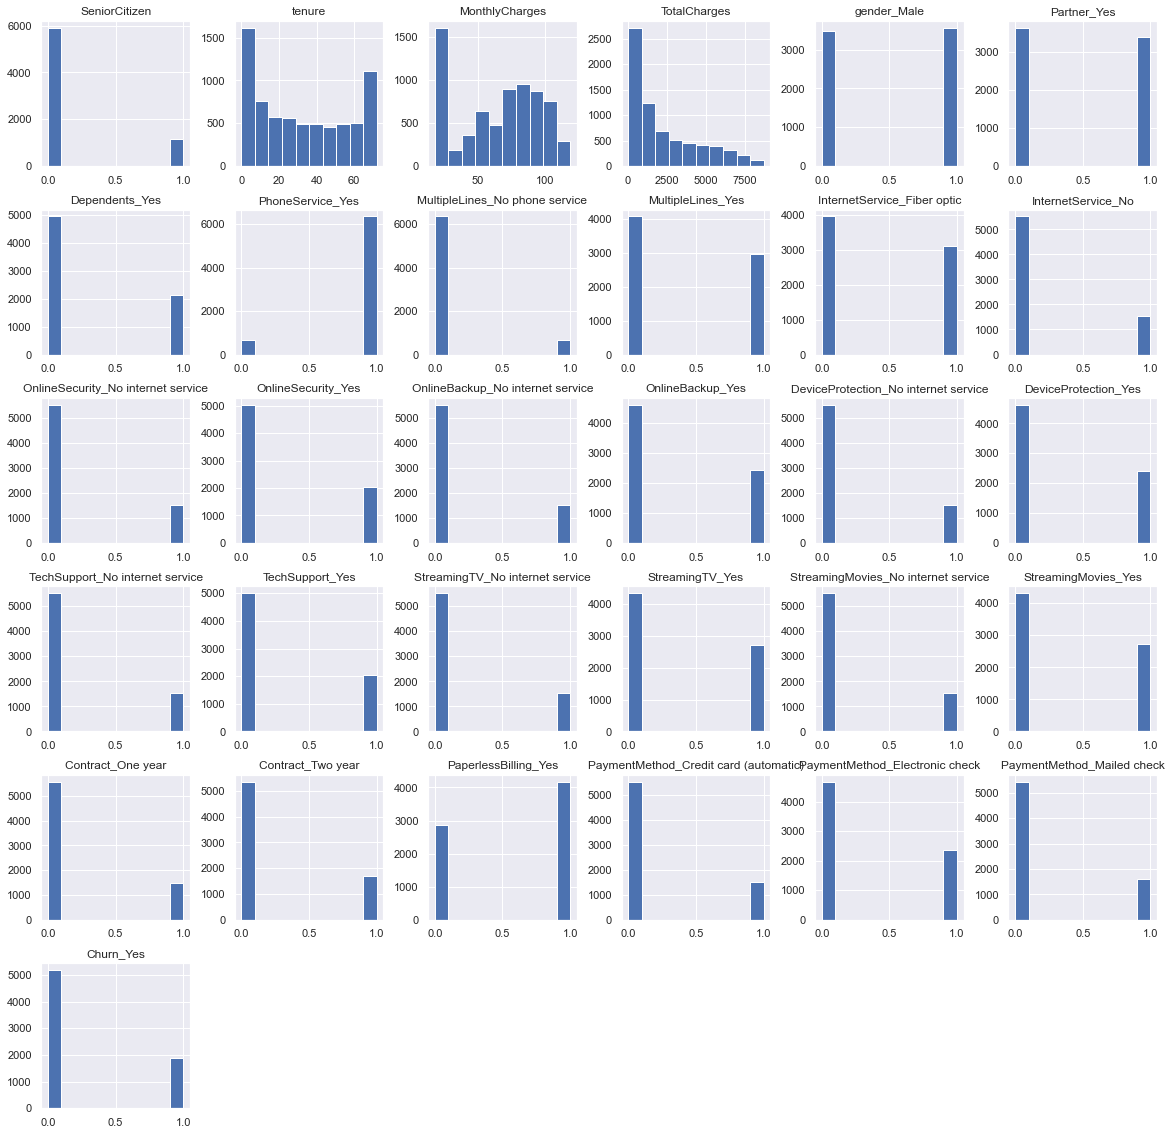

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
cust_data_enc.hist()